In [1]:
import plotly.graph_objects as go
import h5py
import numpy as np

In [2]:
# max order computed
max_order = 32

# open file with reference data
ref_fh = h5py.File("../data/boys_reference.h5", "r")

# open file with computed data
comp_fh = h5py.File("../data/boys_computed.h5", "r")

In [92]:
# initialize empty figure
fig = go.Figure()

In [93]:
for order in range(max_order):  # excluding order = 32 for the moment
    # indices in xs realizing the maximum absolute delta for each region/order
    xs = []
    deltas = []
    for region in ("lo", "mid", "hi"):
        # compute difference
        abs_diff_ys = np.abs(ref_fh[f"{region}_interval/ys/order_{order}"][:] - comp_fh[f"{region}_interval/mcmurchie_davidson/cpu/ys/order_{order}"][:])
        # find index realizing the maximum absolute difference
        idx = np.argmax(abs_diff_ys)
        #print(f"{region=} {idx=}")
        # save maximum absolute difference
        deltas.append(abs_diff_ys[idx])
        # save corresponding x value from reference
        xs.append(ref_fh[f"{region}_interval/xs"][:][idx])
    # add line to plot
    fig.add_trace(
        go.Scatter(
            x=xs,
            y=deltas, 
            mode="markers", 
            name=f"{order}",
            hovertemplate=r"x = %{x}<br>max(|Delta|) = %{y}<extra></extra>",
        )
    )

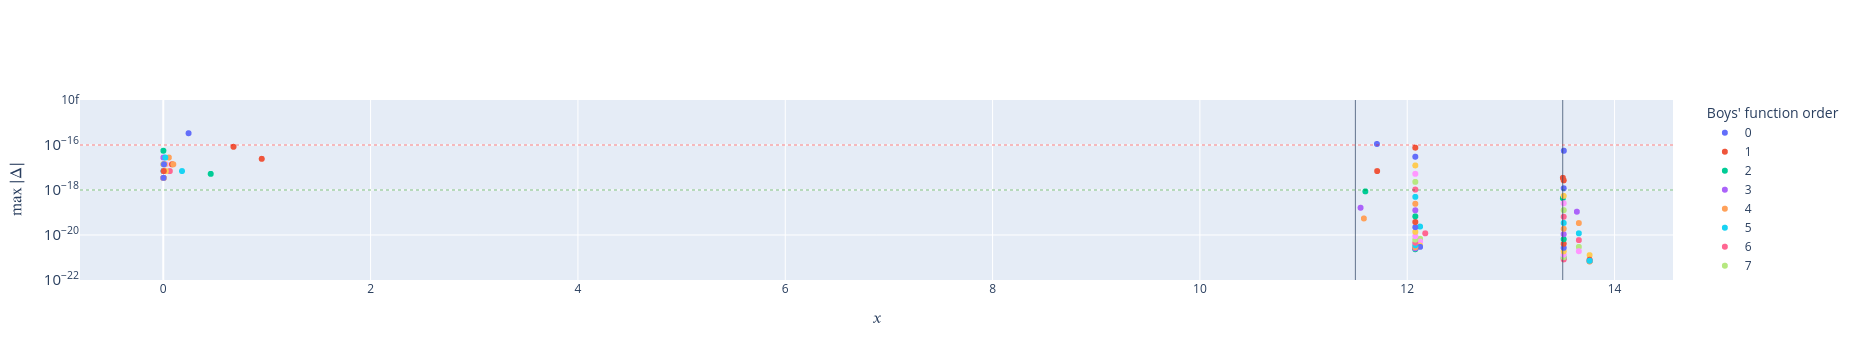

In [94]:
fig.update_layout(legend_title_text="Boys' function order")

fig.update_xaxes(title_text=r"$x$")
fig.update_yaxes(
    title_text=r"$\max|\Delta|$", 
    type="log", 
    range=[-22, -14]
)
# add vertical lines to delimit regions
fig.add_vline(x=11.5, line_width=0.7)
fig.add_vline(x=13.5, line_width=0.7)
# add horizontal lines to delimit precision
fig.add_hline(y=1e-18, 
              line_dash="dot",
              line_width=0.5,
              line_color="green")
fig.add_hline(y=1e-16, 
              line_dash="dot",
              line_width=0.5,
              line_color="red")
fig.show()